In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
X = df[['highway-mpg']]
Y = df['price']

In [6]:
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [8]:
lm.intercept_

38423.3058581574

In [9]:
lm.coef_

array([-821.73337832])

In [10]:
X=df[['engine-size']]
Y=df['price']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]


array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [11]:
lm.intercept_

-7963.338906281049

In [12]:
lm.coef_

array([166.86001569])

In [13]:
# Multiple
Z=df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [14]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [16]:
lm.intercept_

-15806.624626329198

In [17]:
lm2 = LinearRegression()

In [18]:
Z2 = df[['normalized-losses', 'highway-mpg']]

In [19]:
lm2.fit(Z2, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [21]:
lm2.intercept_

38201.313272457264

In [22]:
# Visualization
import seaborn as sns
%matplotlib inline

(0, 48265.96287691027)

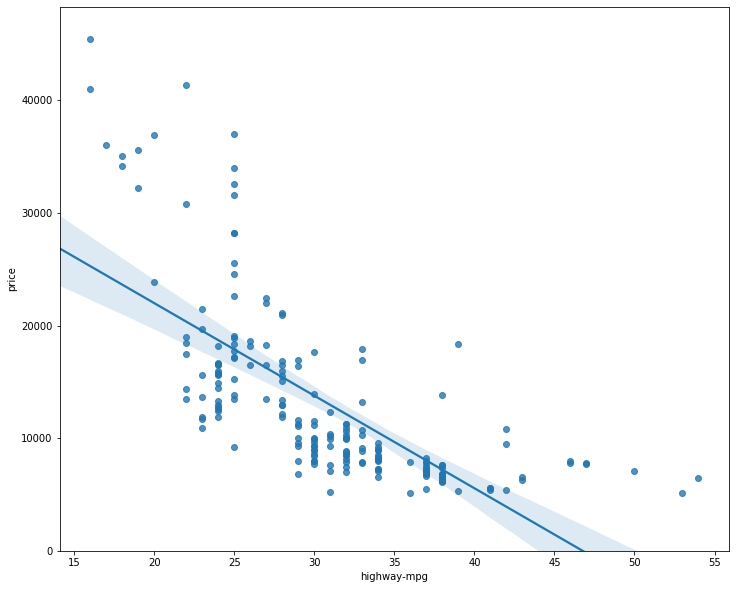

In [23]:
width=12
height=10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y='price', data=df)
plt.ylim(0, )

(0, 47422.919330307624)

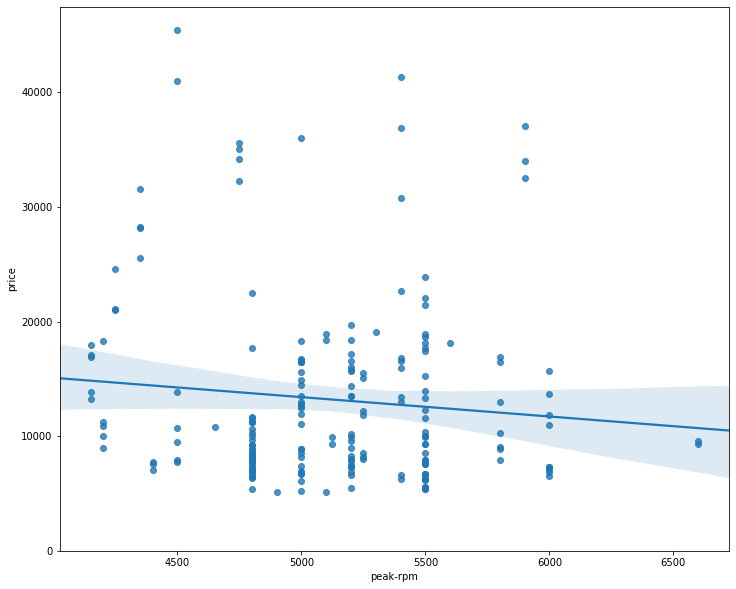

In [24]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y='price', data=df)
plt.ylim(0, )

In [25]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


In [26]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


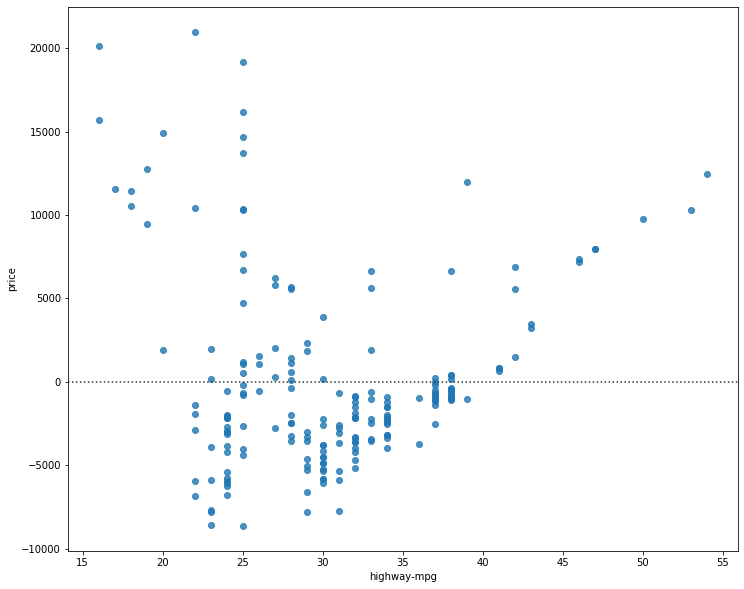

In [27]:
#  Residual Plot
width=12
height=10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

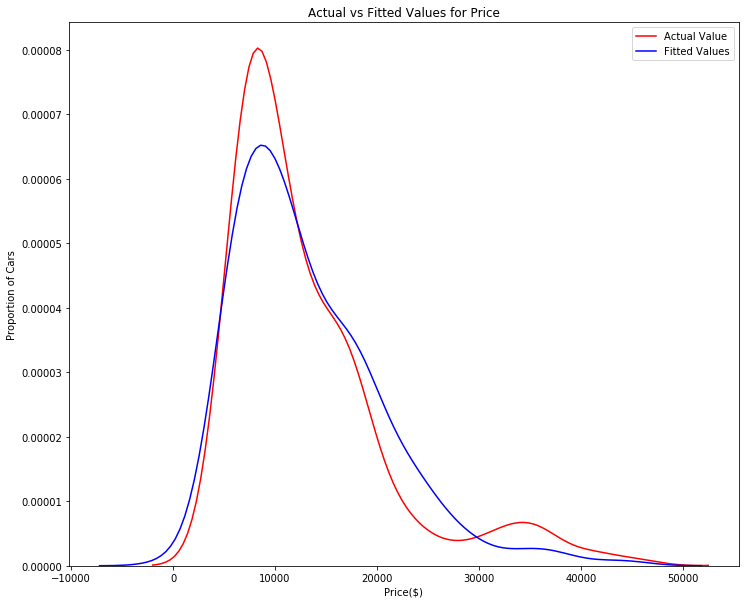

In [28]:
Y_hat = lm.predict(Z)
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color='r', label="Actual Value")
sns.distplot(Y_hat, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price($)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()

In [29]:
# Polynomial Regression

def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Ploynomial Fit with Matplotlib for Price ~ Length')
    ax =plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars($)')
    
    plt.show()
    plt.close()

In [30]:
x= df['highway-mpg']
y= df['price']


In [31]:
# using polynomial of 3rd degree
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


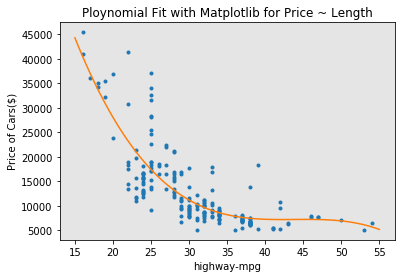

In [32]:
PlotPolly(p, x, y, 'highway-mpg')

In [33]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [34]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


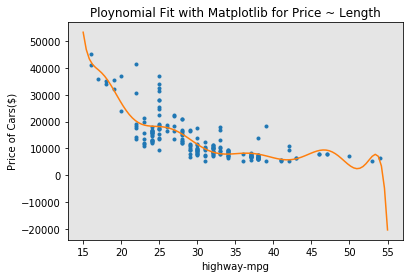

In [35]:
PlotPolly(p1, x, y, 'highway-mpg')


In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [38]:
Z_pr = pr.fit_transform(Z)

In [39]:
Z.shape

(201, 4)

In [40]:
Z_pr.shape

(201, 15)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [42]:
Input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [43]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [44]:
pipe.fit(Z, y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [45]:
ypipe=pipe.predict(Z)

In [46]:
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [47]:
Input=[('scale', StandardScaler()), ('model', LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(Z, y)
ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [48]:
# R-sqaured for SLR
# X is engine-size
lm.fit(X,Y)
print(lm.score(X,Y))

0.7609686443622008


In [51]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is : ', Yhat[0:4])

The output of the first four predicted value is :  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


In [54]:
from sklearn.metrics import mean_squared_error

In [57]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is : ', mse)

The mean square error of price and predicted value is :  15021126.02517414


In [59]:
# MLR
lm.fit(Z, df['price'])
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [60]:
Y_predict_multifit = lm.predict(Z)

In [63]:
print('The MSE of price and predicted values using miltifit is :', \
      mean_squared_error(df['price'], Y_predict_multifit))

The MSE of price and predicted values using miltifit is : 11980366.87072649


In [64]:
# Polynomial Regression
from sklearn.metrics import r2_score

In [65]:
r_squared =r2_score(y, p(x))
print('The R-squared value is: ', r_squared)

The R-squared value is:  0.6741946663906522


In [66]:
mean_squared_error(df['price'], p(x))

20474146.426361203

In [67]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [69]:
newinput =np.arange(1, 100, 1).reshape(-1, 1)

In [71]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
yhat = lm.predict(newinput)
yhat[0:5]

array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

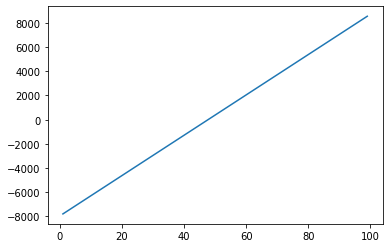

In [75]:
plt.plot(newinput, yhat)
plt.show()